In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

For df1:

Take a look at the data in df1.
Does x increase from time one to time two?
Visualize the relationship between x and time.
Run a statistical test to further examine the relationship between these features.

In [2]:
df1.head()

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one


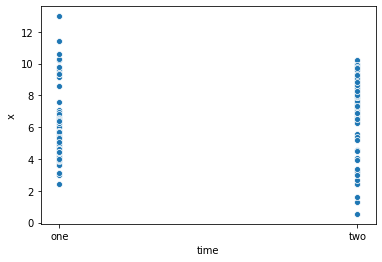

In [4]:
sns.scatterplot(data=df1, x='time', y='x')

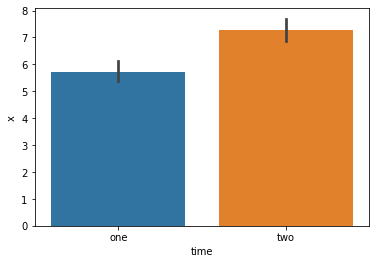

In [5]:
sns.barplot(data=df1, x='time', y='x')

In [9]:
df1['time'] = df1['time'].map({'one': 1, 'two': 2})

In [10]:
x = df1.time
y = df1.x

In [12]:
r, p = stats.pearsonr(x,y)
print('r =', r)
print('p =', p)

r = 0.36081934184293457
p = 1.5320971681721565e-07
